# Wrangling and Analyze Data

## Data Gathering
In the following cells bellow i will be gathering 3 data sets using different methods for each data set.
These dataset will be gathered and loaded into the notebook for the entireety of this project.


1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#importing all the necessary libraries.
import pandas as pd
import numpy as np
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
#import time
#from timeit import default_timer as timer

import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)into a pandas dataframe
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Make directory if it doesn't already exist
folder_name = 'Image_Predicts'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    

In [4]:
#Getting the URL and storing it in a variable
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

#To view the raw data use
#response.content

#Opening and Saving the file to the computer
with open(os.path.join(folder_name, url.split('/')[-1]),mode='wb') as f:
        f.write(response.content)
        
# Reading the gathered file into a pandas dataframe
image_prediction = pd.read_csv(url, sep='\t')
#Check sample data if imported correctly
image_prediction.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API

In [6]:
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)


2356

In [7]:

# Creating an empty list
data = []
# Opening and Reading text file
with open('tweet-json.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        #append each tweet to a line 
        data.append(json.loads(line))
        #save the collected lines of tweet in a data frame data_json
        tweet_data_json = pd.DataFrame(data)
        
        
  

In [8]:
#view the Json file
tweet_data_json.head()


,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


In [9]:
#we want to open the json file and extract just tweet id, retweet and favourite count and load it into a dataframe
# saving to pandas dataframe
tweet_infos = tweet_data_json[['id','retweet_count', 'favorite_count']]

In [10]:

#view the extracted tweet info dataframe to check if we did it corretly
tweet_infos.head()
  

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, i want to detect and document at least **eight (8) quality issues and two (2) tidiness issue** for all gathered datasets
Firstly would be **Visually** by looking through the datasets using microsoft excel for any issues i can find,
the next would be **Programmatic** assessment using python libraries.


**Note:** pay attention to the following key points when accessing the data.

* I only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate my skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* There would be not need to gather the tweets beyond August 1st, 2017. Its possible but not required and i won't be able to gather the image predictions for these tweets beyond that date since i don't have access to the algorithm used.



In [11]:
#Visual assessment of all 3 data sets
twitter_archive


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [12]:
twitter_archive.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
twitter_archive.shape

(2356, 17)

In [15]:
twitter_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [16]:
twitter_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [17]:
sum(twitter_archive.tweet_id.duplicated())

0

In [18]:
np.count_nonzero(twitter_archive['name'].unique())

957

In [19]:
#Visual assessing the Image prediction data set
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [20]:
#programatic assesment
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_prediction.shape

(2075, 12)

In [22]:
image_prediction.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [23]:
#check for duplicate image
sum(image_prediction.jpg_url.duplicated())

66

In [24]:
#Visual assessment of all 3 data sets
tweet_data_json.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
234,Fri Mar 31 00:27:14 +0000 2017,847606175596138505,847606175596138505,This is Cannon. He just heard something behind...,False,"[0, 105]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 847606161679331329, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,20208,False,False,False,False,en,NaN,NaN,NaN,NaN
1087,Wed Jun 01 00:17:54 +0000 2016,737800304142471168,737800304142471168,This is Bella. She's ubering home after a few ...,False,"[0, 90]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 737800291471392769, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,10943,False,False,False,False,en,NaN,NaN,NaN,NaN
1776,Fri Dec 18 16:56:01 +0000 2015,677895101218201600,677895101218201600,Guys this was terrifying. Really spooked me up...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 677895096763854848, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,5275,False,False,False,False,en,NaN,NaN,NaN,NaN
2079,Sun Nov 29 04:32:51 +0000 2015,670822709593571328,670822709593571328,Can't do better than this lol. 10/10 for the o...,False,"[0, 74]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 670822703281086466, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,647,False,False,False,False,en,NaN,NaN,NaN,NaN
667,Sun Oct 23 19:42:02 +0000 2016,790277117346975746,790277117346975746,This is Bruce. He never backs down from a chal...,False,"[0, 77]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 790277108719386624, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,14081,False,False,False,False,en,NaN,NaN,NaN,NaN


In [25]:
tweet_data_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [26]:
#Compare the values in two columns
tweet_data_json['id'].equals(tweet_data_json['id_str'])

False

In [27]:
#Compare the values in two columns
tweet_data_json['created_at'].equals(twitter_archive['timestamp'])


False

In [28]:
#check the shape of the df, in columns and row
tweet_data_json.shape

(2354, 31)

In [29]:
tweet_data_json.dtypes

created_at                        object
id                                 int64
id_str                            object
full_text                         object
truncated                           bool
display_text_range                object
entities                          object
extended_entities                 object
source                            object
in_reply_to_status_id            float64
in_reply_to_status_id_str         object
in_reply_to_user_id              float64
in_reply_to_user_id_str           object
in_reply_to_screen_name           object
user                              object
geo                               object
coordinates                       object
place                             object
contributors                      object
is_quote_status                     bool
retweet_count                      int64
favorite_count                     int64
favorited                           bool
retweeted                           bool
possibly_sensiti

In [30]:
tweet_infos.dtypes

id                int64
retweet_count     int64
favorite_count    int64
dtype: object

In [31]:
tweet_infos.shape

(2354, 3)

In [32]:
sum(tweet_infos.duplicated())


0

In [33]:
#Statistical information of the df
tweet_infos.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Quality issues
1. Since we are working with original tweets, remove records with retweet status id

2. Dogs name are not unique, mistake as some words are mistaken as names

3. Irrelevant columns twitter_archive_cleaned.text and twitter_archive_cleaned.expanded_urls needs to be dropped because I'll not be using it for analysis

4. Irrelevant column Image_prediction.img_num

5. In the “source” column for twitter_archive df, we only want to extract the information we need. we need to strip the html away

6. some rating_denominator do not equal 10, same for numerator 

7. Null values recorded as None needs to replaced with and NaN in twitter archive data frame.

8. Data type for tweet id and time stamp and merge data 

### Tidiness issues
1. Merge all 3 dataset into one master dataframe

2. The columns (doggo, floofer, pupper and puppo) do not need to be separated. Each dog will be classified as one of these classifications. It is better to create one column for dog classification that contains the values (doggo, floofer, pupper and puppo).

## Cleaning Data
In this section, i will now clean **all** of the issues i have documented above after assessing. 

In [34]:
# Make copies of original pieces of data
twitter_archive_cleaned1 = twitter_archive.copy()
image_prediction_cleaned = image_prediction.copy()
#twitter_data_clean = tweet_data_json.copy()
tweet_info_clean = tweet_infos.copy()

### Issue:

#### Define: Drop Rows where Retweeted_status_id is not null (Because We Only need original Tweets for our analysis)

#### Code

In [35]:
#Select only rows without retweet id
twitter_archive_cleaned1 = twitter_archive_cleaned1[twitter_archive_cleaned1.retweeted_status_id.isnull()]


#### Test

In [36]:
#check if any values for retweeted_statud_id is left
twitter_archive_cleaned1.retweeted_status_id.notnull().sum()

0

#### Code

In [37]:
#select colums that has to do with retweet an reply and drop
twitter_archive_cleaned1 = twitter_archive_cleaned1.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],axis=1)

#### Test

In [38]:
twitter_archive_cleaned1.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue :

#### Define : Dogs name are not unique, mistake as some words are mistaken as names.  find the list of wrong names and replace them with  “None”.

#### Code

In [39]:
#Count the names
twitter_archive_cleaned1.name.value_counts()


None          680
a              55
Lucy           11
Charlie        11
Cooper         10
             ... 
Wishes          1
Rose            1
Theo            1
Fido            1
Christoper      1
Name: name, Length: 956, dtype: int64

Observe that correct dogs name starts with a Upper case letters, the incorrectly inputed name starts with lower case letters. such as a, an, etc

In [40]:
# Extract then lower case letter names using REGEX 
wrong_names= twitter_archive_cleaned1.name.str.contains('^[a-z]', regex = True).fillna(False)
twitter_archive_cleaned1[wrong_names].name.value_counts()

a               55
the              8
an               6
one              4
very             4
quite            3
just             3
getting          2
not              2
actually         2
old              1
light            1
life             1
officially       1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
mad              1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

In [41]:
#Select wrong names and replace them with none
for name in wrong_names:
      twitter_archive_cleaned1.name.replace(name, "None", inplace = True)


In [42]:
#select only names with capital letters as these are correct names
twitter_archive_cleaned1 = twitter_archive_cleaned1[twitter_archive_cleaned1['name'].str.contains('^[A-Z]+')]

#### Test

In [43]:
twitter_archive_cleaned1.name.value_counts()

None          680
Lucy           11
Charlie        11
Cooper         10
Oliver         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 931, dtype: int64

In [44]:
len(twitter_archive_cleaned1[wrong_names].name)

0

### Issue :


#### Define :Irrelevant columns twitter_archive_cleaned.text and twitter_archive_cleaned.expanded_urls needs to be dropped because I'll not be using it for analysis


#### Code

In [45]:
twitter_archive_cleaned1 = twitter_archive_cleaned1.drop(['text', 'expanded_urls'],axis = 1)
  

#### Test

In [46]:
twitter_archive_cleaned1.columns

Index(['tweet_id', 'timestamp', 'source', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue :


#### Define :Irrelevant column image_prediction_cleaned.img_num needs to be dropped because I'll not be using it for analysis


#### Code

In [47]:
image_prediction_cleaned = image_prediction_cleaned.drop(['img_num'],axis=1)

#### Test

In [48]:
image_prediction_cleaned.columns

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### Issue #5:


#### Define :In the “source” column for twitter_archive df, we only want to extract the information we need. we need to strip the html code away


#### Code

In [49]:
#check the unique count of source before expanding and stripping it
twitter_archive_cleaned1.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1947
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          87
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       27
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [50]:
# remove the html tags and replace it woth the original text source
twitter_archive_cleaned1.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone', inplace=True)
twitter_archive_cleaned1.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene', inplace=True)
twitter_archive_cleaned1.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client', inplace=True)
twitter_archive_cleaned1.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck', inplace=True)

#### Test

In [51]:
twitter_archive_cleaned1.source.value_counts()

Twitter for iPhone     1947
Vine - Make a Scene      87
Twitter Web Client       27
TweetDeck                10
Name: source, dtype: int64

### Issue : Merge dog stages into 1   

#### Define :Change data type for tweet id to string  and timestamp to date time stamp data type


#### Code

In [52]:
# to add the dogg, floofer, pupper and puppo column together
twitter_archive_cleaned1['dog_stage'] = twitter_archive_cleaned1['doggo'] + twitter_archive_cleaned1['floofer'] + twitter_archive_cleaned1['pupper'] + twitter_archive_cleaned1['puppo'] 

# to check the values of this new column
twitter_archive_cleaned1['dog_stage'].value_counts()

NoneNoneNoneNone        1741
NoneNonepupperNone       213
doggoNoneNoneNone         73
NoneNoneNonepuppo         24
NoneflooferNoneNone        9
doggoNonepupperNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: dog_stage, dtype: int64

In [53]:
#Replacing None with ""
twitter_archive_cleaned1['dog_stage'] = twitter_archive_cleaned1.dog_stage.map(lambda x: x.replace("None", ""))

In [54]:
twitter_archive_cleaned1['dog_stage'].value_counts()

                1741
pupper           213
doggo             73
puppo             24
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [55]:
#Seperating dogs with two stages with comma
twitter_archive_cleaned1.dog_stage.replace('doggopupper', 'doggo, pupper', inplace=True)
twitter_archive_cleaned1.dog_stage.replace('doggopuppo', 'doggo, puppo', inplace=True)
twitter_archive_cleaned1.dog_stage.replace('doggofloofer', 'doggo, floofer', inplace=True)


In [56]:
#finally dropping former dog_stage columns  
twitter_archive_cleaned1 = twitter_archive_cleaned1.drop(['doggo', 'floofer', 'pupper', 'puppo'],axis = 1)

#### Test

In [57]:
#Check the new unique values for new column dog_stage                    
twitter_archive_cleaned1.dog_stage.value_counts() 

                  1741
pupper             213
doggo               73
puppo               24
floofer              9
doggo, pupper        9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

In [58]:

twitter_archive_cleaned1.sample(2)

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage
403,824297048279236611,2017-01-25 16:45:05 +0000,Twitter for iPhone,11,10,Nala,
1796,677301033169788928,2015-12-17 01:35:24 +0000,Twitter for iPhone,5,10,Juckson,


### Issue : some rating_denominator do not equal 10


### Issue :


#### Code

In [59]:
#check the statistical feautures of our cleaned twitter archive df
twitter_archive_cleaned1.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.071000e+03,2071.000000,2071.000000
mean,7.387823e+17,13.271366,10.424915
std,6.777998e+16,48.709300,6.216624
min,6.660209e+17,0.000000,0.000000
25%,6.776992e+17,10.000000,10.000000
50%,7.116948e+17,11.000000,10.000000
75%,7.928288e+17,12.000000,10.000000
max,8.924206e+17,1776.000000,150.000000


The maximim value for the numerator and denominator looks outrageous for avalue close to 10

In [60]:
twitter_archive_cleaned1['rating_denominator'].value_counts().sort_index()

0         1
7         1
10     2052
11        2
15        1
16        1
20        2
40        1
50        2
70        1
80        2
90        1
110       1
120       1
130       1
150       1
Name: rating_denominator, dtype: int64

In [61]:
#drop rows with denominator greater than 100, replacing the denomenators in between 10 and 100 with with the mean value of the denominator
twitter_archive_cleaned1 = twitter_archive_cleaned1[twitter_archive_cleaned1['rating_denominator'] < 100]


In [62]:
#Find the mean
mean_raw  = twitter_archive_cleaned1['rating_denominator'].mean()
mean_denom=np.round(mean_raw)

In [63]:
#replacing the denomenators in between 10 and 100 with with the mean value of the denominator
wrong_denom = list(twitter_archive_cleaned1.query('rating_denominator >=10').index)
for i in wrong_denom:   
       twitter_archive_cleaned1.rating_denominator[i] = mean_denom

#### Test

In [64]:
twitter_archive_cleaned1['rating_denominator'].value_counts().sort_index()

0        1
7        1
10    2065
Name: rating_denominator, dtype: int64

### Repeating same steps for the numerator, find the mean and replace it for values reater that 15, for values greater that 100, drop rows
#### Code

In [65]:
twitter_archive_cleaned1['rating_numerator'].value_counts().sort_index()

0         2
1         7
2         7
3        18
4        14
5        35
6        30
7        48
8        91
9       142
10      419
11      410
12      485
13      300
14       39
15        1
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
75        1
80        1
84        1
88        1
99        1
182       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [205]:
#drop rows with numerations with values greater than 100
twitter_archive_cleaned1 = twitter_archive_cleaned1[twitter_archive_cleaned1['rating_numerator'] < 100]

In [206]:
#calculate the mean numerator value
mean_raw  = twitter_archive_cleaned1['rating_numerator'].mean()
mean_num=np.round(mean_raw)
mean_num

11.0

In [207]:
#replacing the numerations less than 100 but less than 15 with with the mean value of the numerator
wrong_denom = list(twitter_archive_cleaned1.query('rating_numerator >=15').index)
for i in wrong_denom:   
       twitter_archive_cleaned1.rating_numerator[i] = mean_num

#### Test

In [208]:
twitter_archive_cleaned1['rating_numerator'].value_counts().sort_index()

0       2
1       7
2       7
3      18
4      14
5      35
6      30
7      48
8      91
9     142
10    419
11    424
12    485
13    300
14     39
Name: rating_numerator, dtype: int64

### Issue :


#### Define : Null values recorded as None needs to replaced with and NaN in twitter archive data frame .

#### Code

In [209]:
twitter_archive_cleaned1 = twitter_archive_cleaned1.replace(' ', np.nan)

#### Test

In [210]:
twitter_archive_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2061 non-null   int64 
 1   timestamp           2061 non-null   object
 2   source              2061 non-null   object
 3   rating_numerator    2061 non-null   int64 
 4   rating_denominator  2061 non-null   int64 
 5   name                2061 non-null   object
 6   dog_stage           2061 non-null   object
dtypes: int64(3), object(4)
memory usage: 193.4+ KB


### Issue :


#### Define :Change data type for tweet id to string  and timestamp to date time stamp data type


#### Code

In [211]:
twitter_archive_cleaned1['tweet_id'] = twitter_archive_cleaned1['tweet_id'].astype(str)
tweet_info_clean['id'] = tweet_info_clean['id'].astype(str)
image_prediction_cleaned['tweet_id'] = image_prediction_cleaned['tweet_id'].astype(str)
twitter_archive_cleaned1['timestamp']= pd.to_datetime(twitter_archive_cleaned1['timestamp'])

#### Test

In [212]:
twitter_archive_cleaned1.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
rating_numerator                    int64
rating_denominator                  int64
name                               object
dog_stage                          object
dtype: object

### Issue :


#### Define : Collapse dog breed and merge dataframe into 1


#### Code

In [213]:
image_prediction_cleaned.sample(2)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
253,670727704916926465,https://pbs.twimg.com/media/CU7nSZEW4AA6r5u.jpg,wood_rabbit,0.368562,False,tabby,0.309675,False,Egyptian_cat,0.154914,False
1530,789530877013393408,https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg,schipperke,0.363272,True,kelpie,0.197021,True,Norwegian_elkhound,0.151024,True


Images where p1_dog, or p2_dog or p3_dog is false, means that the image is not that is a dog, we will not be using those tweets, so we will query to filter only those that we are certain are dogs

In [214]:
#select and filter only predictions of dog
image_prediction_cleaned = image_prediction_cleaned.query('p1_dog == True | p2_dog == True | p3_dog == True')

In [215]:
# Source:    https://code.i-harness.com/en/q/19c9fbc

# setup the conditions for selection
conditions = [(image_prediction_cleaned['p1_dog'] == True),
              (image_prediction_cleaned['p2_dog'] == True),
              (image_prediction_cleaned['p3_dog'] == True)]

# set the choice order based on the selection conditions for predicted breed
choices_breed = [image_prediction_cleaned['p1'], 
                 image_prediction_cleaned['p2'],
                 image_prediction_cleaned['p3']]

# set the choice order for confidence level based on the selection conditions
choices_confidence = [image_prediction_cleaned['p1_conf'], 
                      image_prediction_cleaned['p2_conf'], 
                      image_prediction_cleaned['p3_conf']]

# select the predicted breed based on the first successful condition
image_prediction_cleaned['Breed'] = np.select(conditions, choices_breed, 
                                       default = 'none')

# select the predicted confidence level based on the first successful condition
image_prediction_cleaned['Confidence'] = np.select(conditions, choices_confidence, 
                                            default = 0)

#### Test

In [216]:
image_prediction_cleaned.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Breed,Confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


In [217]:
#drop columns of the dog breed used for Predictions and are no longer needed 
image_prediction_cleaned = image_prediction_cleaned.drop(['jpg_url','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis = 1)              


In [218]:
image_prediction_cleaned.columns

Index(['tweet_id', 'Breed', 'Confidence'], dtype='object')

In [219]:
tweet_info_clean.head()


,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Merge Dataframe into one

In [220]:
first_master_df = image_prediction_cleaned.merge( twitter_archive_cleaned1, on= 'tweet_id', how= 'left')
master_df = first_master_df.merge(tweet_info_clean, left_on='tweet_id', right_on='id', how= 'inner')

In [221]:
#drop id columns since its the same as tweet id
master_df = master_df.drop(['id'], axis=1)

In [222]:
master_df.sample(5)

,tweet_id,Breed,Confidence,timestamp,source,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
1031,749036806121881602,West_Highland_white_terrier,0.019522,2016-07-02 00:27:45+00:00,Twitter for iPhone,8.0,10.0,Dietrich,,896,3425
1287,793180763617361921,Lakeland_terrier,0.266824,2016-10-31 20:00:05+00:00,Twitter for iPhone,11.0,10.0,Newt,,2310,7740
1206,778624900596654080,Airedale,0.786089,2016-09-21 16:00:17+00:00,Twitter for iPhone,11.0,10.0,Penny,,1176,5177
411,676936541936185344,Chesapeake_Bay_retriever,0.545286,2015-12-16 01:27:03+00:00,Twitter for iPhone,8.0,10.0,None,pupper,5515,13809
275,672975131468300288,pug,0.836421,2015-12-05 03:05:49+00:00,Twitter for iPhone,10.0,10.0,Chuckles,pupper,1015,1813


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [223]:
master_df.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
As far as this data has been analyzed, this is a clean data set. i will now produce some insights and visualization from my wrangled data

### Insights: Some of the questions i will try to answer are:
1. What is the average rating amongst the dogs stage
2. The different unique type of dogs in the data
3. I will also find out the least favourite dog, so that we don't purchase it just yet
4. The most liked dog breed
5. The average number of retweet for each dogstage
6. The source of these picture have any influce on whether the audience likes the dogs
7. Is there a relationship between the likes and retweet

In [247]:
#importing library needed for visualization
import matplotlib.pyplot as plt


In [228]:
#the average rating amongst the dogs over 10
mean_rating=master_df.groupby('dog_stage')['rating_numerator'].mean()
mean_rating

dog_stage
                  10.803254
doggo             11.925926
doggo, floofer    11.000000
doggo, pupper     11.000000
doggo, puppo      13.000000
floofer           12.000000
pupper            10.849057
puppo             11.952381
Name: rating_numerator, dtype: float64

### To list the unique types of dogs in the dataset

In [1]:
# Uniquhttp://localhost:8888/notebooks/Untitled%20Folder/wrangle_act.ipynb#To-list-the-unique-types-of-dogs-in-the-datasete type of dogs in the data
master_df.Breed.unique().len()

NameError: name 'master_df' is not defined

### Visualization

### The least liked dogs in the dataset by retweets and likes

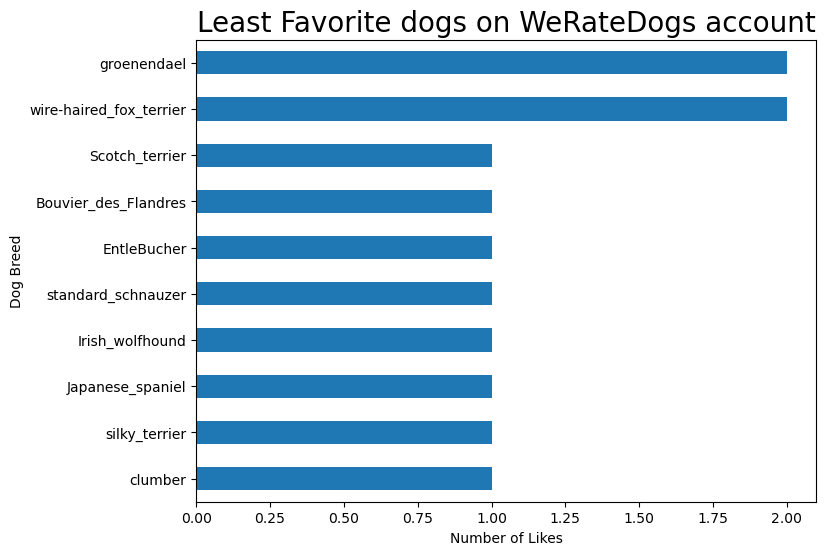

In [242]:
fig = plt.figure(figsize=(8,6))
leastfavdog = master_df.groupby('Breed').count()['favorite_count'].sort_values(ascending=False).nsmallest(10)
leastfavdog.plot(kind='barh')
plt.title("Least Favorite dogs on WeRateDogs account",fontsize=20)
plt.ylabel("Dog Breed")
plt.xlabel("Number of Likes"); 

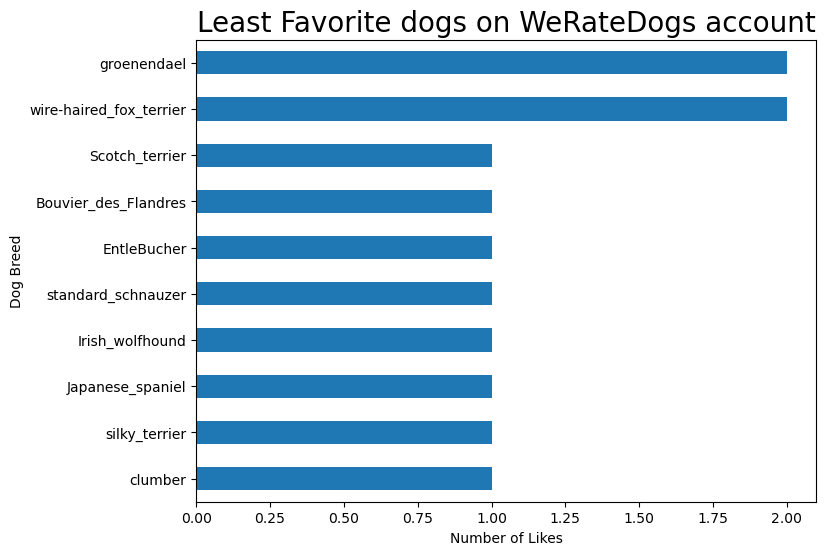

In [246]:
fig = plt.figure(figsize=(8,6))
leastfavdog = master_df.groupby('Breed').count()['retweet_count'].sort_values(ascending=False).nsmallest(10)
leastfavdog.plot(kind='barh')
plt.title("Least Favorite dogs on WeRateDogs account",fontsize=20)
plt.ylabel("Dog Breed")
plt.xlabel("Number of retweet"); 

There are 8 different dog breed with 1 like and at least 1 retweet, it seems the audience are not big fans of these breeds. i wonder why


### The Most liked dogs in the dataset by likes

Text(0, 0.5, 'Number of Likes')

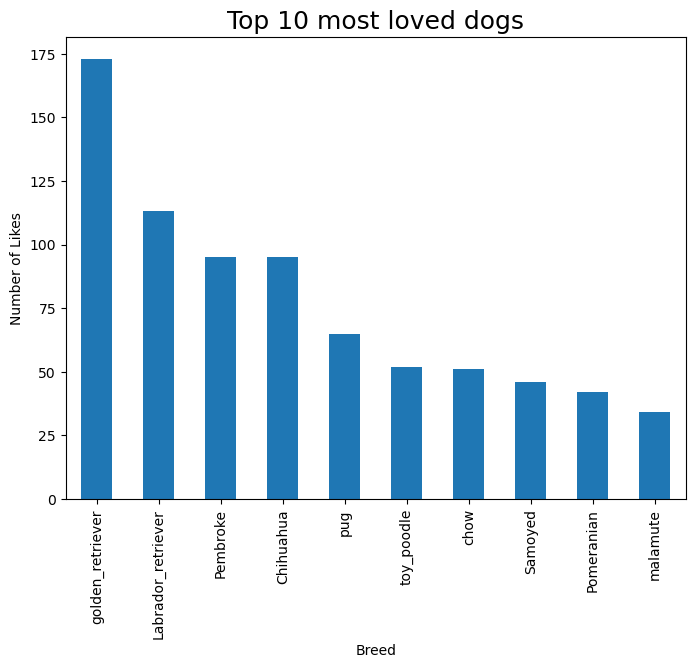

In [257]:
#Most favorite dogs according to data
master_df.groupby('Breed').count()['favorite_count'].sort_values(ascending=False).nlargest(10).plot(kind='bar', figsize=(8,6))
plt.title('Top 10 most loved dogs', fontsize=18)
plt.ylabel('Number of Likes')


### The average number of retweet for each dogstage

Text(0.5, 0, 'Dog_stage')

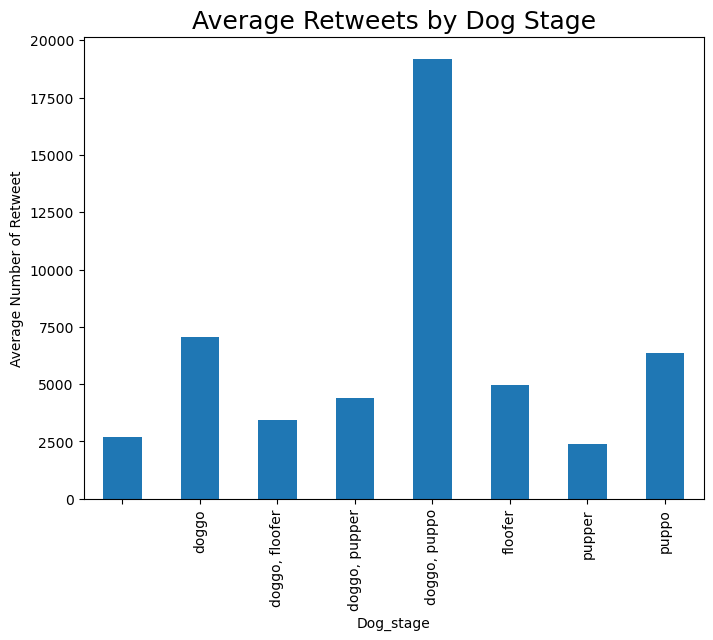

In [269]:
# Extract separate dog types
Avg_retweet = master_df.groupby('dog_stage')['retweet_count'].mean()
Avg_retweet.plot(kind='bar', figsize=(8,6))
plt.title('Average Retweets by Dog Stage', fontsize=18)
plt.ylabel('Average Number of Retweet')
plt.xlabel('Dog_stage')

### The source of these picture have any influence on whether the audience likes the dogs enought to retweet

In [286]:
master_df.source.value_counts()

Twitter for iPhone    1574
Twitter Web Client      19
TweetDeck                9
Name: source, dtype: int64

source
Twitter Web Client    3003.368421
Twitter for iPhone    2873.966328
TweetDeck             1753.777778
Name: retweet_count, dtype: float64


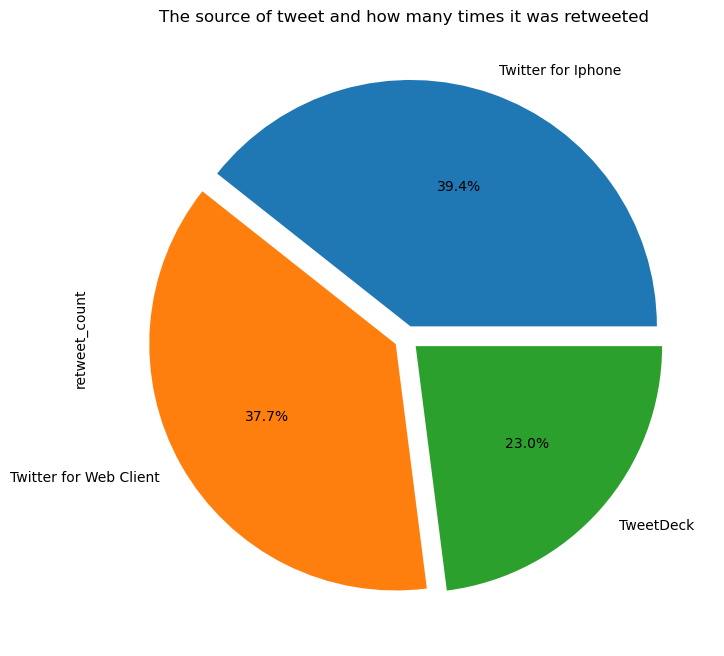

In [285]:

 #counts the mean value for each source grouping by favorite_count
source_fav = master_df.groupby('source')['retweet_count'].mean().sort_values(ascending=False)
print(source_fav)

#See the percentage of the source and the average number of retweets using a pie chart
source_fav.plot(kind = 'pie',labels = ['Twitter for Iphone','Twitter for Web Client','TweetDeck'], explode=(0.05,0.05,0.05),autopct = '%1.1f%%', figsize = (8,8))
plt.title("The source of tweet and how many times it was retweeted ");

    

### Is there a relationship between the likes and retweet

Text(0, 0.5, 'LIkes')

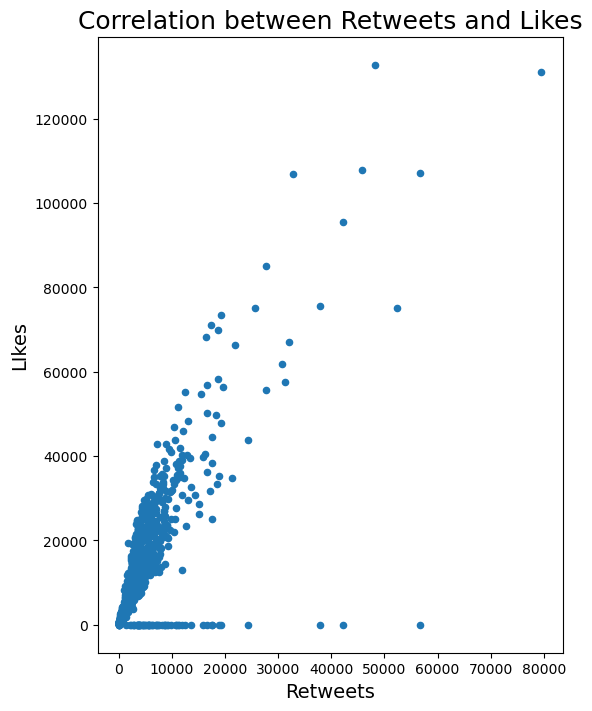

In [290]:
# a simple scattered plot showing relationship between the likes and retweet
master_df.plot(x = "retweet_count", y = "favorite_count", kind ='scatter', figsize=(6,8))
plt.title('Correlation between Retweets and Likes', fontsize=18)
plt.xlabel('Retweets', fontsize=14)
plt.ylabel('LIkes', fontsize=14)

In [289]:
correlation =master_df['retweet_count'].corr(master_df['favorite_count'])

correlation

0.7886787936750513

There is high correlation since the value is 0.788 and very close to 1. This means that the relationship betweet favorite and retweets is rather strong, tweets with retweets are mostlikely to also have likes.